In [1]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
import matplotlib.pyplot as plt
from keras.layers import Flatten,Dense
from sklearn.metrics import accuracy_score

In [2]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
X_train = X_train/255
X_test = X_test/255

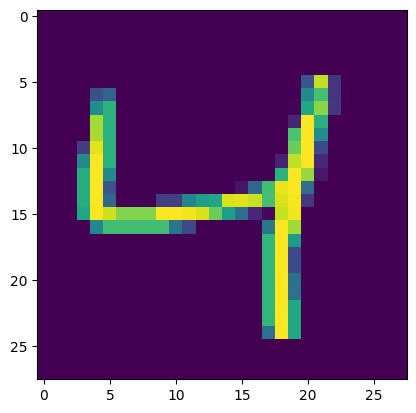

In [4]:
plt.imshow(X_train[2])

In [5]:
model = Sequential()
model.add(Flatten(input_shape = (28,28)))
model.add(Dense(128,activation = "relu"))
model.add(Dense(10,activation = "softmax"))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [7]:
model.compile(loss = "sparse_categorical_crossentropy",metrics = "accuracy",optimizer = "Adam")

In [8]:
history = model.fit(X_train,y_train,epochs = 10,validation_split = 0.3,)

Epoch 1/10
1313/1313 [==============================] - 5s 4ms/step - loss: 0.3029 - accuracy: 0.9122 - val_loss: 0.1731 - val_accuracy: 0.9509
Epoch 2/10
1313/1313 [==============================] - 5s 4ms/step - loss: 0.1328 - accuracy: 0.9607 - val_loss: 0.1312 - val_accuracy: 0.9603
Epoch 3/10
1313/1313 [==============================] - 6s 4ms/step - loss: 0.0896 - accuracy: 0.9737 - val_loss: 0.1218 - val_accuracy: 0.9648
Epoch 4/10
1313/1313 [==============================] - 5s 4ms/step - loss: 0.0684 - accuracy: 0.9796 - val_loss: 0.1054 - val_accuracy: 0.9689
Epoch 5/10
1313/1313 [==============================] - 6s 5ms/step - loss: 0.0524 - accuracy: 0.9836 - val_loss: 0.0963 - val_accuracy: 0.9718
Epoch 6/10
1313/1313 [==============================] - 5s 4ms/step - loss: 0.0410 - accuracy: 0.9874 - val_loss: 0.1040 - val_accuracy: 0.9687
Epoch 7/10
1313/1313 [==============================] - 6s 4ms/step - loss: 0.0327 - accuracy: 0.9903 - val_loss: 0.0996 - val_accuracy:

In [9]:
y = model.predict(X_test)

313/313 [==============================] - 1s 1ms/step


In [10]:
y_pred = y.argmax(axis = 1)
y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [11]:
accuracy_score(y_test,y_pred)

0.9746

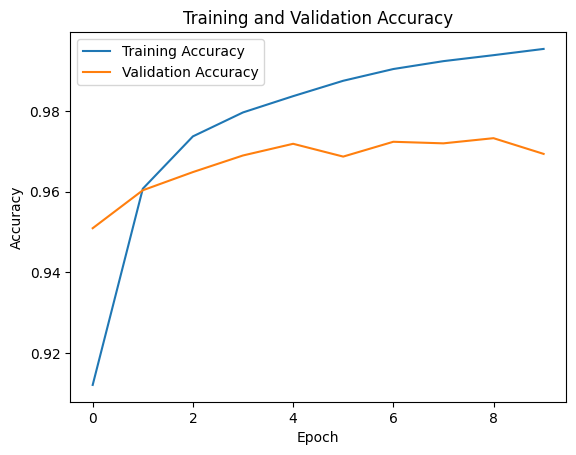

In [12]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()